# Статистический анализ данных / Python
## Задание 4

**Правила:**

* Дедлайн **8 декаюря 23:59**.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 4"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.


In [9]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests
from tqdm import tqdm_notebook

In [2]:
from collections import Counter

In [67]:
from statsmodels.stats.diagnostic import kstest_normal

In [3]:
cl1 = '#985cff'
cl2 = '#00b899'


__________________
### Задача 1. (3 балла)

С помощью критерия хи-квадрат проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

*Указания*
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления плотности воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код для *конкретной* реализации выборки. Так проще реализовать, и проще проверять.

Для проверки условий применимости следует обратить внимание на размер выборки (который должен быть больше 50), ожидаемое количество элементов в $B_{j}$ должно быть больше 5, в соответствии с распределением $P_0$ (пуассоновское, в нашем случае).

In [377]:
sample=sps.poisson(mu=5).rvs(size=1000) #сгенерируем выборку

In [378]:
vals=np.unique(sample, return_counts=True)[0]

In [379]:
vals #посмотрим на уникальные значения

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [380]:
bin_limits=np.array([0,    2,   4,   6,  8, 10,  12, np.inf]) #зададим границы

In [381]:
#bin_limits=vals

In [382]:
nfreq, bins = np.histogram(sample, bins=bin_limits) #расчитаем наблюдаемые частоты

In [383]:
nfreq

array([ 37, 215, 358, 246, 110,  28,   6], dtype=int64)

In [384]:
expected = np.diff(stats.poisson.cdf(bin_limits-1,mu=5)) * 1000 #расчитаем ожидаемые частоты, 
                                                                #каждые из которых должны быть не меньше 5

In [385]:
expected 

array([ 40.42768199, 224.5982333 , 350.93473954, 250.6676711 ,
       101.54361676,  26.37496539,   5.45309191])

In [386]:
print (stats.chisquare(nfreq, expected)) #посчитаем значение статистики и pvalue

Power_divergenceResult(statistic=1.7891662278549374, pvalue=0.9380320571429686)


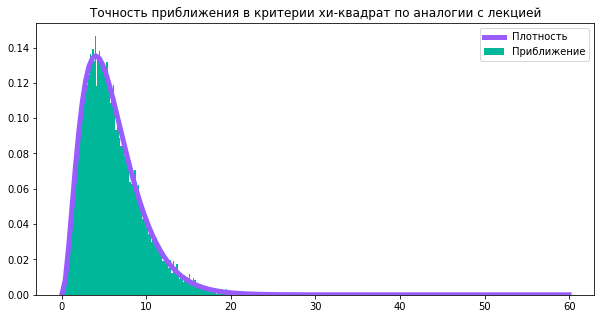

In [304]:
sample_size = 1000
sample_count = 20000
chisq_values = np.zeros(sample_count)
bin_limits=np.array([0,    2,   4,   6,  8, 10,  12, np.inf])
for i in tqdm_notebook(range(sample_count)):
    sample = sps.poisson(mu=5).rvs(size=sample_size)
    #bin_limits=np.array(np.arange(len(np.unique(sample, return_counts=True)[0])))
    nfreq, bins = np.histogram(sample, bins=bin_limits)
    expected = np.diff(stats.poisson.cdf(bin_limits-1,mu=5)) * sample_size    
    chisq_values[i] = stats.chisquare(nfreq, expected)[0]

plt.figure(figsize=(10, 5))
grid = np.linspace(0, 60, 150)
plt.plot(grid, sps.chi2(df=6).pdf(grid), lw=5, color=cl1, label='Плотность')
plt.hist(chisq_values, bins=200,color=cl2, density=True, label='Приближение')
plt.title('Точность приближения в критерии хи-квадрат по аналогии с лекцией')
plt.legend();

**Вывод:**

Похоже, что scipy не врет, и действительно генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. При использовании критерия хи-квадрат необходимые условия были соблюдены.

__________________
### Задача 2. (5 баллов)


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>, взяв все колонки, кроме `Class`.

In [10]:
data=pd.read_csv('wine.data',header=None)

In [11]:
data.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [12]:
data=data.drop(['Class'],axis=1)

In [13]:
len(data.columns)

13

Для каждого параметра нарисуте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько столбцов, используя `plt.subplot`.

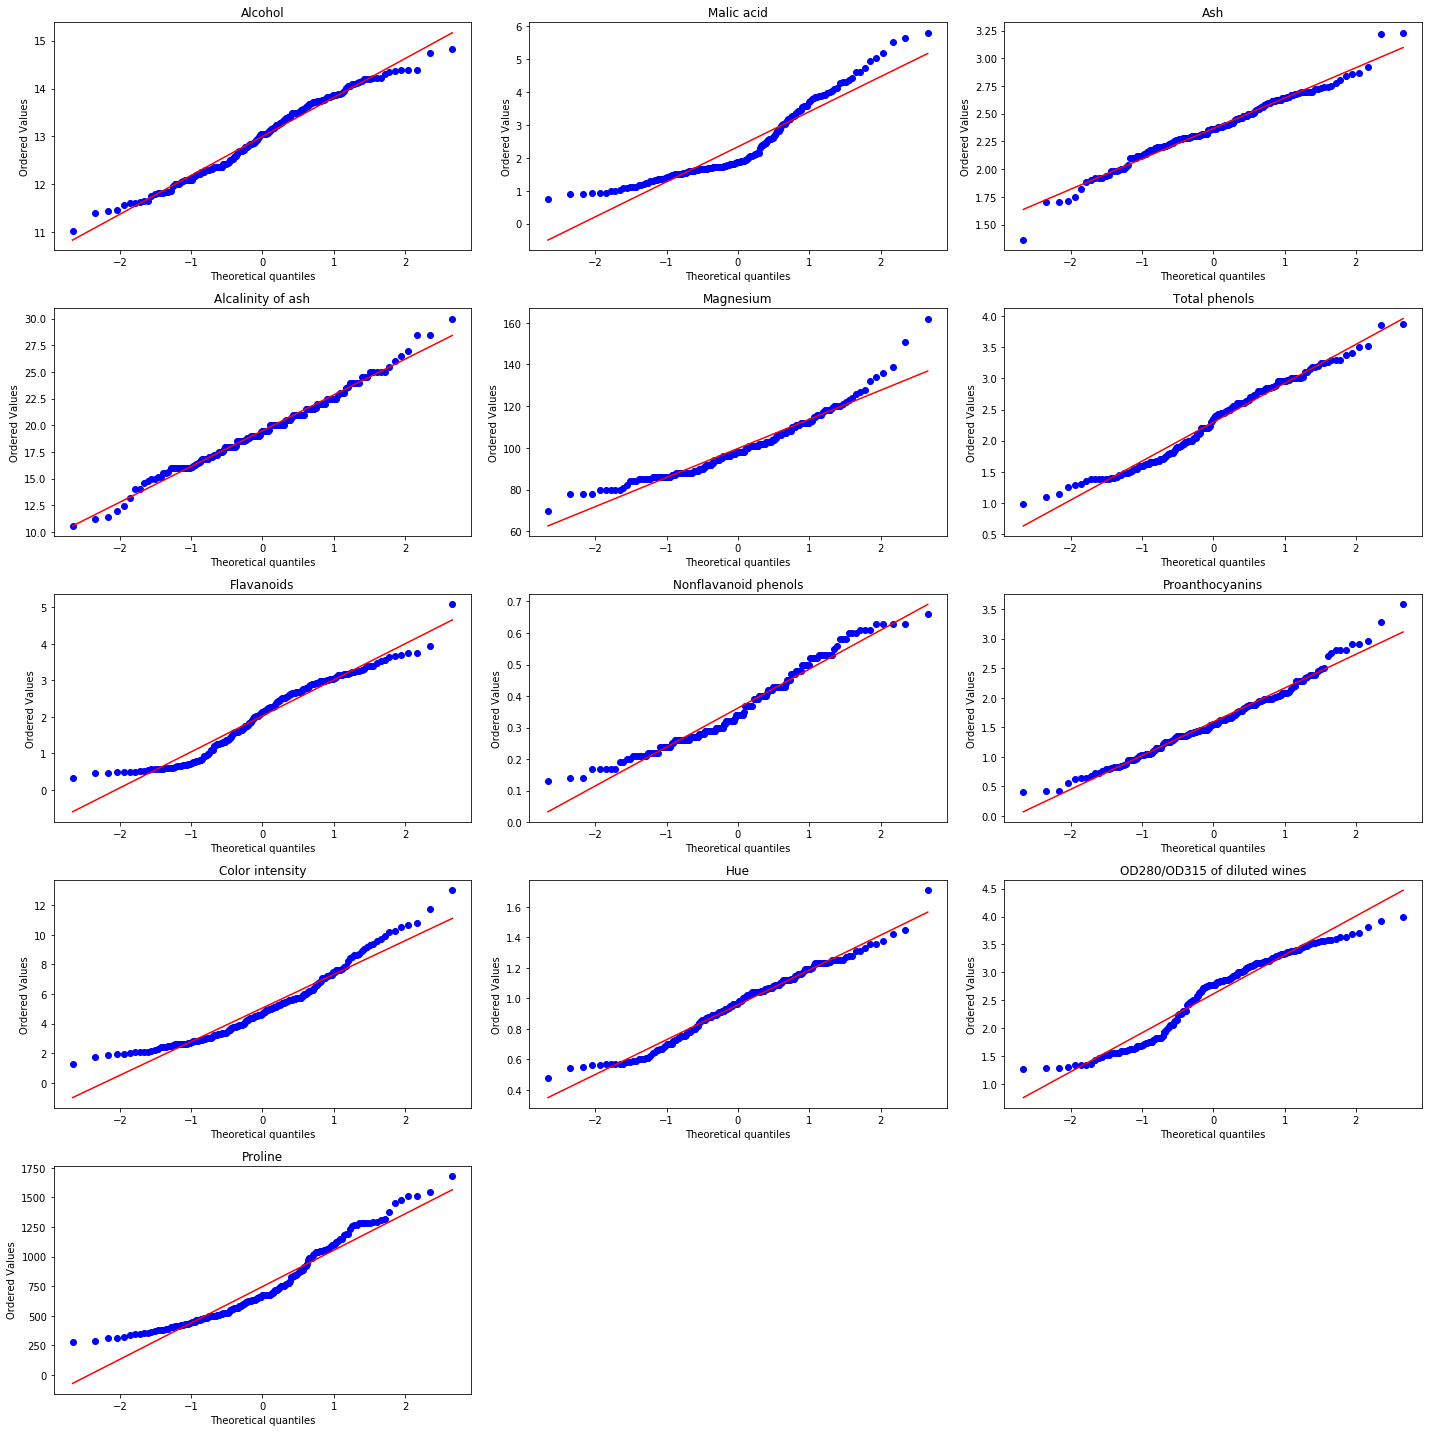

In [14]:
plt.figure(figsize=(20, 20))
for feature,i in zip(data.columns,range(len(data.columns))):
    sample = data[feature].values
    ax = plt.subplot(5, 3, i+1)
    sps.probplot(sample, plot=ax)
    plt.title(str(feature))
plt.tight_layout()
plt.show()

Для каких параметров можно говорить об их нормальности и почему?

**Ответ:** Для признаков Alcohol, Ash, Alcalinity of ash, Total phenols, Proanthocyanins и Hue точки лежат довольно близко к прямой и график носит линейный характер. Для других признаков имеют место графики нелинейного характера, выбросы. Для таких признаков следует применять более строгие численные критерии, что будет сделано далее.

Проверьте нормальность каждого параметра статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы.

Для каждого параметра используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** Будем использовать критерии из лекции, а именно: Критерий согласия Колмогорова, Критерий Шапиро-Уилка, Критерий Жарка-Бера

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех параметров и всех критериев сразу. Почему так нужно делать?

**Ответ:**  Данная процедура проводится для устранения эффекта множественных сравнений. В нашем случае, при одновременном построении 13 заключений(для каждого признака) вероятность совершить хотя бы одну ошибку первого рода будет ограничена сверху величиной $(1-(1-0.05)^{13})$, то есть, с достаточно большой вероятностью рассматриваемое множество выводов содержит ошибочные. Поэтому нам необходимо совершить корректировку.

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** будем использовать метод Benjamini/Hochberg, согласно графику из лекции данный метод обладает большей мощностью, чем, например, bonferroni или holm.

Как понять из результата процедуры множественной проверки гипотез, нормальность каких параметров следует отклонить?

**Ответ:** Если для признака будет присутствовать хотя бы одно значение True (отвергаем гипотезу согласно хотя бы одному из критериев), т.е. гипотеза отвергается.

Если нормальность не отклоняется, что можно сказать про выборку (ответ в презентации с лекции)? 

**Ответ:**  Можно считать, что выборка согласуется с основной гипотезой. (о нормальности распределения) 

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результат нужно собрать обратно в таблицу с помощью метода `reshape`, которому нужно передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия переменных, а названий столбцов --- используемые критерии.

In [16]:
table=data.copy()

In [68]:
ps=[]

In [70]:
for col,i in zip(table.columns,range(len(table.columns))):
    row=[#sps.kstest(data[col], sps.norm(*sps.norm.fit(data[col])).cdf)[1],
          kstest_normal(data[col])[1],
          sps.shapiro(data[col])[1],
          sps.jarque_bera(data[col])[1]]
    ps.append(row)
    
#     pvalues[i,0]=sps.kstest(data[col],sps.norm(*sps.norm.fit(data[col])).cdf)[1],          
#     pvalues[i,1]=sps.shapiro(data[col])[1],           
#     pvalues[i,2]=sps.jarque_bera(data[col])[1]

In [71]:
ps # полученные значения до корректировки

[[0.04404785134835377, 0.02005171775817871, 0.061067754785150585],
 [1.555976407850091e-17, 2.9459296113643063e-10, 1.1154257029133419e-07],
 [0.2, 0.03868526220321655, 0.008485916875615174],
 [0.07713065093198859, 0.26386943459510803, 0.2509338426798371],
 [0.0014032613722156644, 6.345416068143095e-07, 6.8833827526759706e-15],
 [0.024916616358900922, 0.004395752213895321, 0.06312187970473382],
 [0.0030054151058792125, 1.6790636436780915e-05, 0.05273119890069067],
 [5.543311509527982e-06, 0.00010552661115070805, 0.010713589807909929],
 [0.2, 0.01445337850600481, 0.00784097737369327],
 [0.001162926765498595, 9.22947720027878e-07, 1.0922618061126599e-05],
 [0.088297047627054, 0.01742566004395485, 0.6012441704509763],
 [3.3047973065555586e-06, 2.3160500859376043e-06, 0.0030877482919717814],
 [1.205788870536564e-07, 1.7412214958767436e-07, 0.00013937700362820493]]

In [72]:
ps_table=pd.DataFrame(ps, columns = ['ks','shapiro','jarque_bera'], index=data.columns) #соответствующая таблица до корректировки

In [73]:
ps_table

,ks,shapiro,jarque_bera
Alcohol,4.404785e-02,2.005172e-02,6.106775e-02
Malic acid,1.555976e-17,2.945930e-10,1.115426e-07
Ash,2.000000e-01,3.868526e-02,8.485917e-03
Alcalinity of ash,7.713065e-02,2.638694e-01,2.509338e-01
Magnesium,1.403261e-03,6.345416e-07,6.883383e-15
Total phenols,2.491662e-02,4.395752e-03,6.312188e-02
Flavanoids,3.005415e-03,1.679064e-05,5.273120e-02
Nonflavanoid phenols,5.543312e-06,1.055266e-04,1.071359e-02
Proanthocyanins,2.000000e-01,1.445338e-02,7.840977e-03
Color intensity,1.162927e-03,9.229477e-07,1.092262e-05


In [74]:
corrected=multipletests(np.array(ps).ravel())[0]

In [75]:
corrected_tf=pd.DataFrame(np.array(corrected).reshape(len(table.columns),3), columns = ['ks','shapiro','jarque_bera'], index=data.columns)

In [79]:
corrected_pv=pd.DataFrame(np.array(multipletests(np.array(ps).ravel(),method='fdr_bh')[1]).reshape(len(table.columns),3), columns = ['ks','shapiro','jarque_bera'], index=data.columns)

In [80]:
corrected_tf #таблица после корректировки 

,ks,shapiro,jarque_bera
Alcohol,False,False,False
Malic acid,True,True,True
Ash,False,False,False
Alcalinity of ash,False,False,False
Magnesium,True,True,True
Total phenols,False,False,False
Flavanoids,False,True,False
Nonflavanoid phenols,True,True,False
Proanthocyanins,False,False,False
Color intensity,True,True,True


In [81]:
corrected_pv

,ks,shapiro,jarque_bera
Alcohol,5.923677e-02,3.007758e-02,7.682718e-02
Malic acid,6.068308e-16,3.829708e-09,9.405153e-07
Ash,2.166667e-01,5.388304e-02,1.504322e-02
Alcalinity of ash,9.115441e-02,2.708134e-01,2.644978e-01
Magnesium,3.219247e-03,3.535303e-06,1.342260e-13
Total phenols,3.599067e-02,8.571717e-03,7.692979e-02
Flavanoids,6.338010e-03,5.037191e-05,6.855056e-02
Nonflavanoid phenols,1.965356e-05,2.939670e-04,1.816652e-02
Proanthocyanins,2.166667e-01,2.348674e-02,1.456182e-02
Color intensity,2.834634e-03,4.499370e-06,3.549851e-05


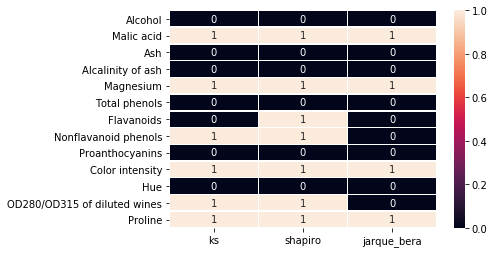

In [89]:
sns.heatmap(corrected_tf,annot=True,linewidths=.5)

Для каких параметров нормальность не отвергается?

**Ответ:** Alcohol, Ash, Alcalinity of ash, Total phenols, Proanthocyanins,Hue. Для данных признаков ни один из критериев не отверг нулевую гипотезу. 